In [23]:
with open("/home/srchand/resnet_pyserial_hex_10x3.log", 'rb') as myfile:
    full_file = bytearray()
    while(byte := myfile.read(1)):
        full_file.append(int.from_bytes(byte,"big"))

In [24]:
extracted_vals = full_file.split(b'\r\n')
# extracted_vals = extracted_vals[1:]
ro_values = []
for val in extracted_vals:
#     if(len(val) >= 2 and len(val) <= 5):
#         if(val[0] == 10 and len(val) > 3):
#             val = val[1:]
    if len(val) == 3:
        ro_values.append(int.from_bytes(val,"big"))
#     if(int_val <= 2097151):
#         ro_values.append(int.from_bytes(val,"big"))

ro_values = ro_values[:-1]

In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.DataFrame(ro_values)

In [27]:
len(df)

149790

array([<AxesSubplot:>], dtype=object)

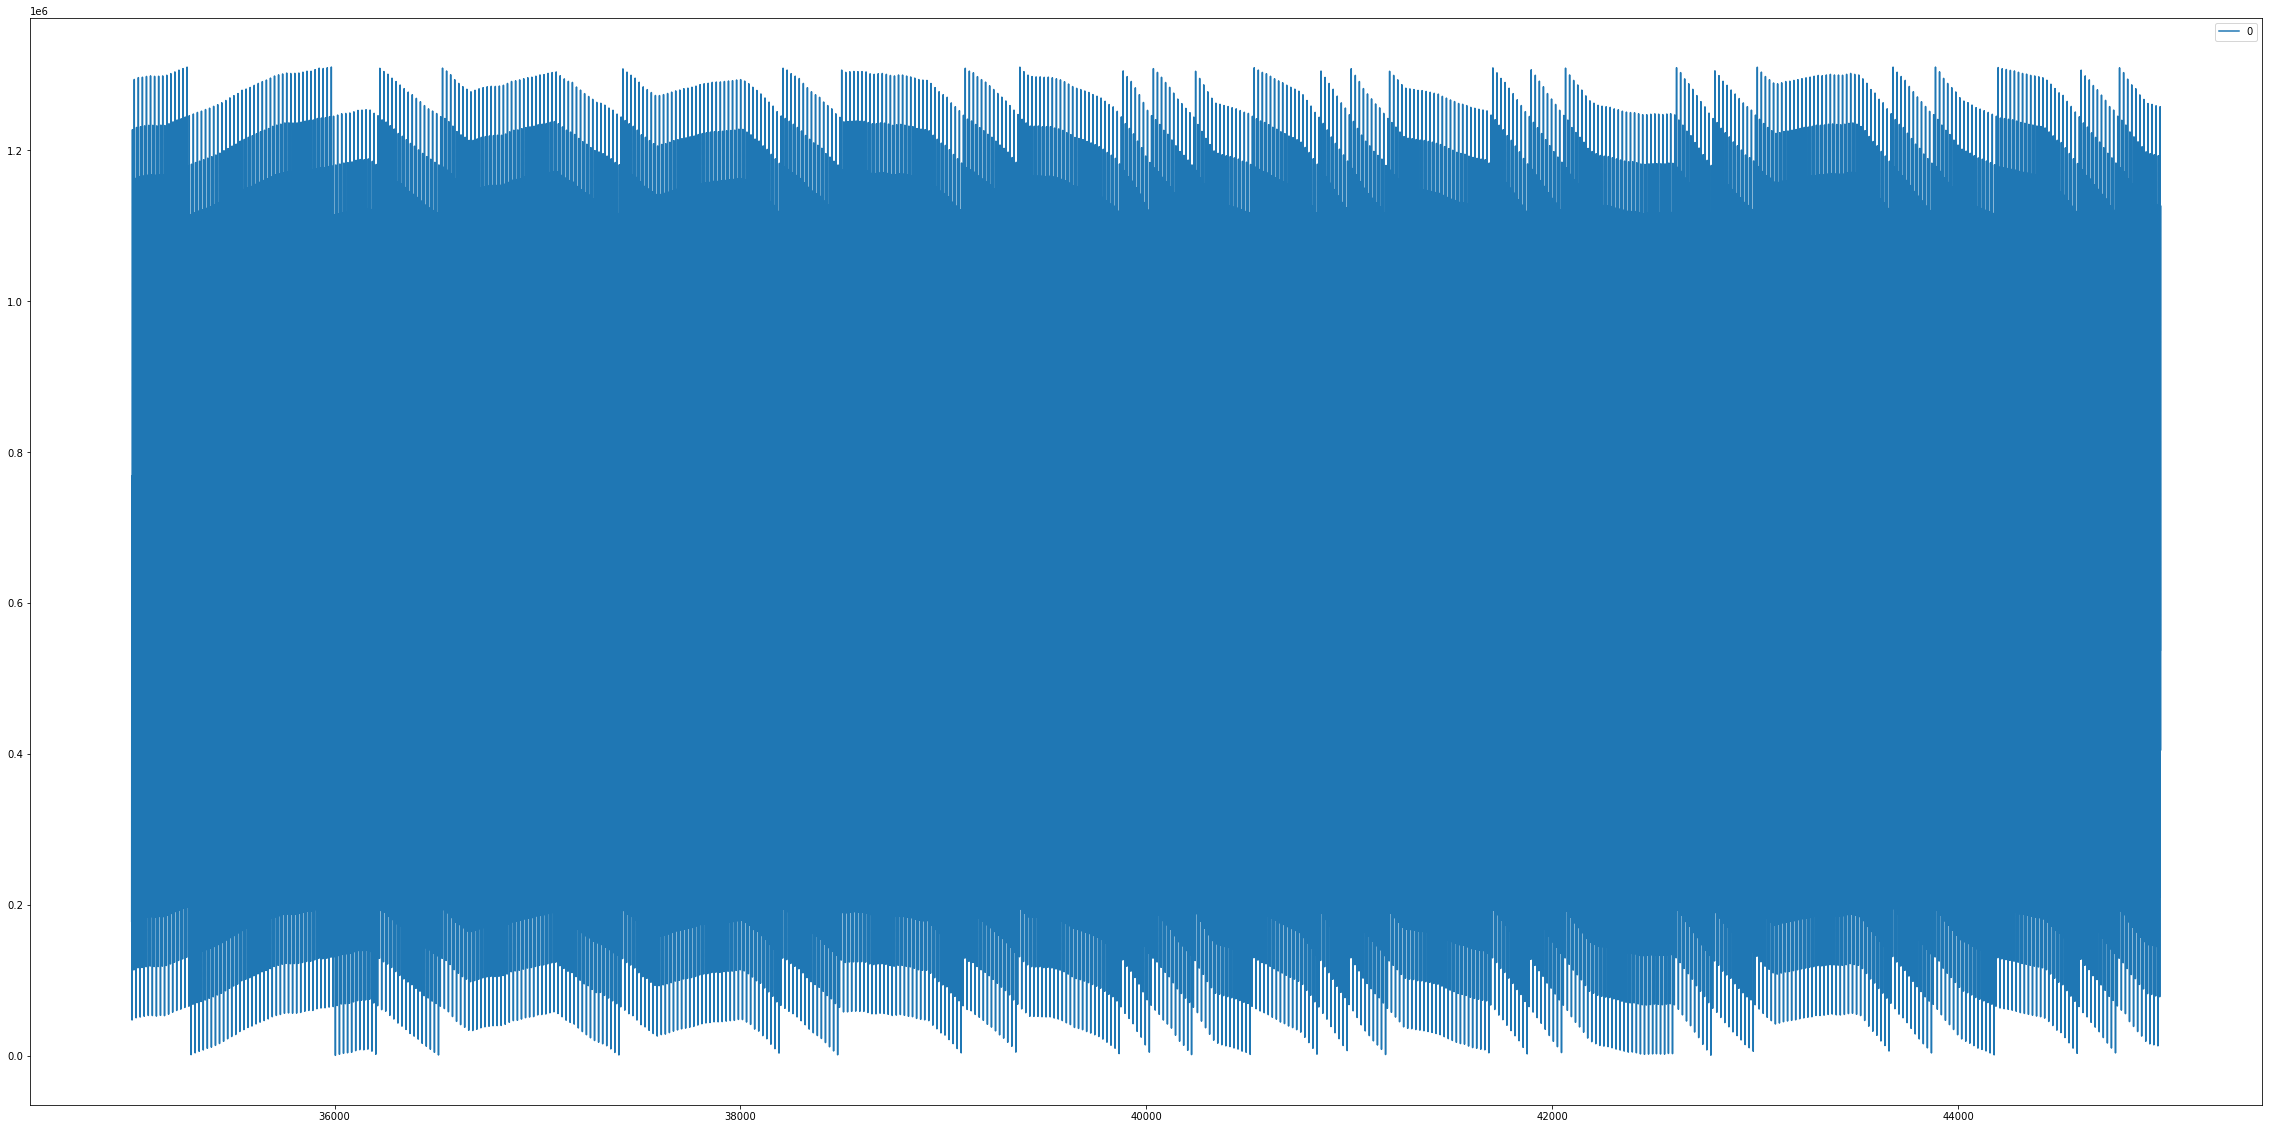

In [29]:
df[35000:45000].plot(subplots=True, figsize=(40,20))

In [ ]:
from pandas.plotting import autocorrelation_plot
import seaborn as sns

In [ ]:
autocorrelation_plot(df)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose = seasonal_decompose(df,model='additive', period=1000)
decompose.plot()

In [ ]:
rolling_mean = df.rolling(1000).mean()
rolling_std = df.rolling(1000).std()

plt.plot(df, color="blue",label="Original RO Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean RO")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation RO")
plt.title("RO Time series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")